# 기계학습 활용 고객이탈예측 튜토리얼

## 필수 라이브러리 준비

In [1]:
import os
import numpy as np
import pandas as pd

# 1. 데이터 준비
- 데이터 읽어오기
- 데이터 병합
- 데이터 인코딩
- 결측치 제거
- 데이터 밸런싱
- 데이터 분리

## 데이터 읽어오기
- Customer data
- Transaction data

In [2]:
file_path1 = r"C:\Users\Simon\Dropbox\10_강의\[2022-2] 한양대_차경진_교수님_특강\강의자료\churning_customers.csv"

customer_df = pd.read_csv(file_path1, encoding='cp949')
customer_df.head()

,고객ID,성별,연령,개시일,서비스기간,단선횟수,지불방법,요금제,핸드셋
0,K100010,남,46,18/07/99,15.066667,1,선불,CAT50,SOP10
1,K100020,남,27,18/09/97,37.333333,0,선불,CAT50,SOP10
2,K100030,남,39,23/08/96,50.366667,2,선불,CAT50,SOP20
3,K100040,남,28,18/08/98,26.200000,2,선불,CAT50,SOP10
4,K100050,남,47,11/08/98,26.433333,0,선불,CAT50,SOP10


In [3]:
customer_df.shape

(20000, 9)

In [4]:
customer_df.drop(['개시일', '지불방법', '핸드셋'], axis=1, inplace=True)

In [5]:
customer_df.head()

,고객ID,성별,연령,서비스기간,단선횟수,요금제
0,K100010,남,46,15.066667,1,CAT50
1,K100020,남,27,37.333333,0,CAT50
2,K100030,남,39,50.366667,2,CAT50
3,K100040,남,28,26.200000,2,CAT50
4,K100050,남,47,26.433333,0,CAT50


In [6]:
file_path2 = r"C:\Users\Simon\Dropbox\10_강의\[2022-2] 한양대_차경진_교수님_특강\강의자료\churning_transactions.csv"

transaction_df = pd.read_csv(file_path2, encoding='cp949')
transaction_df.head()

,고객ID,주간통화횟수,주간통화시간_분,야간통화횟수,야간통화시간_분,주말통화횟수,주말통화시간_분,국제통화시간_분,국내통화요금_분,평균주간통화시간,평균야간통화시간,평균주말통화시간,국내통화횟수,국내통화시간_분,평균국내통화시간,총통화시간_분,이탈여부
0,K100010,14,36.131353,10,7.973121,24,14.533282,1.443889,0.0,2.580811,0.797312,0.605553,48,58.637756,1.221620,60.081645,이탈
1,K100020,54,39.437279,34,21.152722,0,0.000000,9.779366,0.0,0.730320,0.622139,0.000000,88,60.590001,0.688523,70.369367,이탈
2,K100030,44,72.600000,1,27.600000,22,37.200001,16.601092,0.0,1.650000,27.600000,1.690909,67,137.400001,2.050746,154.001093,이탈
3,K100040,44,72.600000,1,27.600000,22,37.200000,16.601076,0.0,1.650000,27.600000,1.690909,67,137.400000,2.050746,154.001076,이탈
4,K100050,32,40.608449,14,18.823708,1,1.233764,4.473546,0.0,1.269014,1.344551,1.233764,47,60.665921,1.290764,65.139467,이탈


In [7]:
transaction_df.shape

(20000, 17)

In [8]:
transaction_df['이탈여부'] = transaction_df['이탈여부'].map({"이탈":1, "유지":0})

In [9]:
transaction_df.head()

,고객ID,주간통화횟수,주간통화시간_분,야간통화횟수,야간통화시간_분,주말통화횟수,주말통화시간_분,국제통화시간_분,국내통화요금_분,평균주간통화시간,평균야간통화시간,평균주말통화시간,국내통화횟수,국내통화시간_분,평균국내통화시간,총통화시간_분,이탈여부
0,K100010,14,36.131353,10,7.973121,24,14.533282,1.443889,0.0,2.580811,0.797312,0.605553,48,58.637756,1.221620,60.081645,1
1,K100020,54,39.437279,34,21.152722,0,0.000000,9.779366,0.0,0.730320,0.622139,0.000000,88,60.590001,0.688523,70.369367,1
2,K100030,44,72.600000,1,27.600000,22,37.200001,16.601092,0.0,1.650000,27.600000,1.690909,67,137.400001,2.050746,154.001093,1
3,K100040,44,72.600000,1,27.600000,22,37.200000,16.601076,0.0,1.650000,27.600000,1.690909,67,137.400000,2.050746,154.001076,1
4,K100050,32,40.608449,14,18.823708,1,1.233764,4.473546,0.0,1.269014,1.344551,1.233764,47,60.665921,1.290764,65.139467,1


## 데이터 병합
- 데이터 베이스의 SQL 형식으로 2개의 데이터셋을 병합

In [10]:
churn_df = pd.merge(customer_df, transaction_df, how='inner', on='고객ID')

In [11]:
churn_df.shape

(20000, 22)

In [12]:
churn_df.head()

,고객ID,성별,연령,서비스기간,단선횟수,요금제,주간통화횟수,주간통화시간_분,야간통화횟수,야간통화시간_분,...,국제통화시간_분,국내통화요금_분,평균주간통화시간,평균야간통화시간,평균주말통화시간,국내통화횟수,국내통화시간_분,평균국내통화시간,총통화시간_분,이탈여부
0,K100010,남,46,15.066667,1,CAT50,14,36.131353,10,7.973121,...,1.443889,0.0,2.580811,0.797312,0.605553,48,58.637756,1.221620,60.081645,1
1,K100020,남,27,37.333333,0,CAT50,54,39.437279,34,21.152722,...,9.779366,0.0,0.730320,0.622139,0.000000,88,60.590001,0.688523,70.369367,1
2,K100030,남,39,50.366667,2,CAT50,44,72.600000,1,27.600000,...,16.601092,0.0,1.650000,27.600000,1.690909,67,137.400001,2.050746,154.001093,1
3,K100040,남,28,26.200000,2,CAT50,44,72.600000,1,27.600000,...,16.601076,0.0,1.650000,27.600000,1.690909,67,137.400000,2.050746,154.001076,1
4,K100050,남,47,26.433333,0,CAT50,32,40.608449,14,18.823708,...,4.473546,0.0,1.269014,1.344551,1.233764,47,60.665921,1.290764,65.139467,1


In [13]:
churn_df.drop(['고객ID'], axis=1, inplace=True)

In [14]:
churn_df.head()

,성별,연령,서비스기간,단선횟수,요금제,주간통화횟수,주간통화시간_분,야간통화횟수,야간통화시간_분,주말통화횟수,...,국제통화시간_분,국내통화요금_분,평균주간통화시간,평균야간통화시간,평균주말통화시간,국내통화횟수,국내통화시간_분,평균국내통화시간,총통화시간_분,이탈여부
0,남,46,15.066667,1,CAT50,14,36.131353,10,7.973121,24,...,1.443889,0.0,2.580811,0.797312,0.605553,48,58.637756,1.221620,60.081645,1
1,남,27,37.333333,0,CAT50,54,39.437279,34,21.152722,0,...,9.779366,0.0,0.730320,0.622139,0.000000,88,60.590001,0.688523,70.369367,1
2,남,39,50.366667,2,CAT50,44,72.600000,1,27.600000,22,...,16.601092,0.0,1.650000,27.600000,1.690909,67,137.400001,2.050746,154.001093,1
3,남,28,26.200000,2,CAT50,44,72.600000,1,27.600000,22,...,16.601076,0.0,1.650000,27.600000,1.690909,67,137.400000,2.050746,154.001076,1
4,남,47,26.433333,0,CAT50,32,40.608449,14,18.823708,1,...,4.473546,0.0,1.269014,1.344551,1.233764,47,60.665921,1.290764,65.139467,1


## One-Hot encoding
- 이산형 데이터 (categorical data)를 처리하는 방법
- 이산형 데이터가 가지는 값의 개수만큼의 0과 1로 표현하는 배열 생성

In [15]:
churn_df = pd.get_dummies(churn_df)
churn_df.head()

,연령,서비스기간,단선횟수,주간통화횟수,주간통화시간_분,야간통화횟수,야간통화시간_분,주말통화횟수,주말통화시간_분,국제통화시간_분,...,평균국내통화시간,총통화시간_분,이탈여부,성별_남,성별_여,요금제_CAT100,요금제_CAT200,요금제_CAT50,요금제_Play100,요금제_Play300
0,46,15.066667,1,14,36.131353,10,7.973121,24,14.533282,1.443889,...,1.221620,60.081645,1,1,0,0,0,1,0,0
1,27,37.333333,0,54,39.437279,34,21.152722,0,0.000000,9.779366,...,0.688523,70.369367,1,1,0,0,0,1,0,0
2,39,50.366667,2,44,72.600000,1,27.600000,22,37.200001,16.601092,...,2.050746,154.001093,1,1,0,0,0,1,0,0
3,28,26.200000,2,44,72.600000,1,27.600000,22,37.200000,16.601076,...,2.050746,154.001076,1,1,0,0,0,1,0,0
4,47,26.433333,0,32,40.608449,14,18.823708,1,1.233764,4.473546,...,1.290764,65.139467,1,1,0,0,0,1,0,0


In [16]:
cols = list(churn_df.columns)
cols.remove('이탈여부')
cols.append('이탈여부')
print(cols)

['연령', '서비스기간', '단선횟수', '주간통화횟수', '주간통화시간_분', '야간통화횟수', '야간통화시간_분', '주말통화횟수', '주말통화시간_분', '국제통화시간_분', '국내통화요금_분', '평균주간통화시간', '평균야간통화시간', '평균주말통화시간', '국내통화횟수', '국내통화시간_분', '평균국내통화시간', '총통화시간_분', '성별_남', '성별_여', '요금제_CAT100', '요금제_CAT200', '요금제_CAT50', '요금제_Play100', '요금제_Play300', '이탈여부']


In [17]:
churn_df = churn_df[cols]

## 결측치 탐색 및 제거
- 결측치 데이터 제거 
- 결측치를 평균, 중앙값 등의 다른 값으로 대체(imputation)

In [18]:
churn_df.isnull()

,연령,서비스기간,단선횟수,주간통화횟수,주간통화시간_분,야간통화횟수,야간통화시간_분,주말통화횟수,주말통화시간_분,국제통화시간_분,...,평균국내통화시간,총통화시간_분,성별_남,성별_여,요금제_CAT100,요금제_CAT200,요금제_CAT50,요금제_Play100,요금제_Play300,이탈여부
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
churn_df.isnull().sum()

연령             0
서비스기간          0
단선횟수           0
주간통화횟수         0
주간통화시간_분       0
야간통화횟수         0
야간통화시간_분       0
주말통화횟수         0
주말통화시간_분       0
국제통화시간_분       0
국내통화요금_분       0
평균주간통화시간       0
평균야간통화시간       0
평균주말통화시간       0
국내통화횟수         0
국내통화시간_분       0
평균국내통화시간       0
총통화시간_분        0
성별_남           0
성별_여           0
요금제_CAT100     0
요금제_CAT200     0
요금제_CAT50      0
요금제_Play100    0
요금제_Play300    0
이탈여부           0
dtype: int64

## Data Balancing
- Data imbalance는 현실의 많은 분류 문제에서 존재하는 이슈
- 가장 기본적인 Undersampling 방법 이용

In [20]:
churn_df['이탈여부'].value_counts()

0    10069
1     9931
Name: 이탈여부, dtype: int64

In [21]:
major_class, minor_class = churn_df['이탈여부'].value_counts()

In [22]:
major_data = churn_df[churn_df['이탈여부'] == 0.0]
minor_data = churn_df[churn_df['이탈여부'] == 1.0]

under_major_data = major_data.sample(n= minor_class, random_state=123)

print("major_data:", major_data.shape)
print("under_major_data:", under_major_data.shape)
print("minor_data:", minor_data.shape)

major_data: (10069, 26)
under_major_data: (9931, 26)
minor_data: (9931, 26)


In [23]:
balanced_data = pd.concat([under_major_data, minor_data], axis=0)

In [24]:
balanced_data['이탈여부'].value_counts()

1    9931
0    9931
Name: 이탈여부, dtype: int64

## Data split
- Train data: 모델 학습을 위한 데이터
- Validation data: 학습된 모델의 성능을 확인하고자 이용되는 데이터 (파라미터 튜닝 등 각종 모델의 실험에 사용)
- Test data: 최종적으로 학습이 완료된 모델의 성능을 보고하고자 이용되는 데이터 (개념적으로는 현재 갖지 않는 미래 데이터)

In [25]:
train_data = balanced_data.sample(frac=0.8, random_state=123)
test_data = balanced_data.drop(train_data.index)

val_data = train_data.sample(frac=0.2, random_state=123)
train_data = train_data.drop(val_data.index)

In [26]:
print("Train_data shape:", train_data.shape)
print("Val_data shape:", val_data.shape)
print("Test_data shape:", test_data.shape)

Train_data shape: (12712, 26)
Val_data shape: (3178, 26)
Test_data shape: (3972, 26)


# 2. 기계학습 모델 학습 및 평가

## 모델 평가 도구
- 분류 문제에서 일반적으로 사용되는 성능 평가 기준들
- 기본적으로 **'얼마나 맞췄는가?'**

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## pd.DataFrame >> np.array
- sklearn의 함수들이 numpy의 array형태로 데이터를 받기 때문에 데이터 형 변환
- 인풋 데이터 (X)와 아웃풋 데이터 (y)를 따로 준비

In [28]:
train_X = np.array(train_data.iloc[:, :-1])
train_y = np.array(train_data.iloc[:, -1])

val_X = np.array(val_data.iloc[:, :-1])
val_y = np.array(val_data.iloc[:, -1])

test_X = np.array(test_data.iloc[:, :-1])
test_y = np.array(test_data.iloc[:, -1])

## Random Forest (RF)
- 대표적인 앙상블(Ensemble) 방법으로 분류 및 회귀 문제 모두에서 사용 가능
- Bootstrap (Sampling with replacement) 과 Random Subspace 방식을 이용하여 많은 수의 다른 의사결정나무 생성

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(n_jobs=4, random_state=123)
rf.fit(train_X, train_y)

RandomForestClassifier(n_jobs=4, random_state=123)

In [31]:
train_pred = rf.predict(train_X)
val_pred = rf.predict(val_X)
test_pred = rf.predict(test_X)

print("The first 10 prediction values for train_X:", train_pred[:10])
print("The first 10 prediction values for val_X:", val_pred[:10])
print("The first 10 prediction values for test_X:", test_pred[:10])

The first 10 prediction values for train_X: [0 0 1 1 1 1 0 1 0 0]
The first 10 prediction values for val_X: [1 1 1 1 1 0 0 1 0 0]
The first 10 prediction values for test_X: [0 0 0 0 0 0 0 0 0 0]


In [32]:
train_acc = accuracy_score(train_y, train_pred)
train_f1 = f1_score(train_y, train_pred)

print("train_acc:", train_acc)
print("train_f1:", train_f1)

train_acc: 0.9984266834487099
train_f1: 0.998422712933754


In [33]:
val_acc = accuracy_score(val_y, val_pred)
val_f1 = f1_score(val_y, val_pred)

print("val_acc:", val_acc)
print("val_f1:", val_f1)

val_acc: 0.7869729389553178
val_f1: 0.7788304475661548


In [34]:
test_acc = accuracy_score(test_y, test_pred)
test_f1 = f1_score(test_y, test_pred)

print("test_acc:", test_acc)
print("test_f1:", test_f1)

test_acc: 0.7849949647532729
test_f1: 0.7790998448008278


# 3. 실험을 위한 코드 작성
- 반복 실험 및 재사용을 위한 함수별 코드 작성
- 파라미터 튜닝을 통한 모델 성능 향상
- 실험 결과표 작성
- 그래프 작성

In [36]:
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score

### timer 함수
- 목적: 시간측정
- 입력: 시작 시간, 종료 시간
- 출력: 계산된 분, 초

In [37]:
def timer(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

### training 함수
- 목적: 파라미터 튜닝을 통한 최적 모델 학습 
- 입력: 알고리즘 이름, 파라미터들, Train 데이터, Val 데이터
- 출력: 학습된 최적 모델

In [38]:
def training(model, params, train_X, train_y, val_X, val_y):
    print("Model:", model)
    best_acc = None
    for i, para in enumerate(params):
        start_time = time.time()
        
        if model == "rf":
            clf = RandomForestClassifier(n_estimators=para, n_jobs=4, random_state=123)
        elif model == "svm":
            clf = SVC(C=para, random_state=123)
        elif model == 'ann':
            clf = MLPClassifier(hidden_layer_sizes=(para), random_state=123)
            
        clf.fit(train_X, train_y)

        train_pred = clf.predict(train_X)
        val_pred = clf.predict(val_X)
        
        train_acc = accuracy_score(train_y, train_pred)
        val_acc = accuracy_score(val_y, val_pred)

        m, s = timer(start_time, time.time())

        print("Took: {}m {}s | {} | Train acc: {:.3f} | Val acc: {:.3f}".format(m, s, para, train_acc, val_acc))

        if best_acc:
            if val_acc > best_acc:
                best_clf = clf
                best_para = para
                best_acc = val_acc
        else:                               # 초기화
            best_acc = val_acc
            best_clf = clf
            best_para = para

    print("Best para: {} when Val acc: {:.3f}".format(best_para, best_acc))
    return best_clf

### evaluation 함수
- 목적: 모델 성능 측정
- 입력: 실제값, 예측값
- 출력: acc와 f1이 담겨있는 np.array

In [39]:
def evaluation(true, pred):
    acc = accuracy_score(true, pred)
    f1 = f1_score(true, pred)

    results = np.array([acc, f1])    
    return results

### experiment 함수
- 목적: 여러 모델에 대한 실험 수행
- 입력: 모델이름의 리스트, 각 모델에 필요한 파라미터들의 리스트, train 데이터, val 데이터, test 데이터
- 출력: 각 모델별로 실험 결과가 담겨진 dict

In [40]:
def experiment(model_list, params_list, train_X, train_y, val_X, val_y, test_X, test_y):

    result_dict = {}
    for model, params in zip(model_list, params_list):
        
        clf = training(model, params, train_X, train_y, val_X, val_y)
        
        val_pred = clf.predict(val_X)
        test_pred = clf.predict(test_X)
        
        val_result = evaluation(val_y, val_pred)
        test_result = evaluation(test_y, test_pred)
        
        results = np.hstack([val_result, test_result]) # 총 4 차원의 벡터
        
        result_dict[model] = results
    
    return result_dict

### table 함수
- 목적: 실험 결과를 표의 형태로 정리
- 입력: 모델 리스트, 실험 결과 dict
- 출력: 실혐 결과인 pd.DataFrame

In [41]:
def table(model_list, result_dict):
    result_mat = np.zeros(shape = (len(model_list), 4))
    
    for i, model in enumerate(model_list):
        result = result_dict[model] # 4 차원 벡터
        result_mat[i] = result
        
    cols = ['val_acc', 'val_f1', 'test_acc', 'test_f1']
    result_df = pd.DataFrame(result_mat, columns= cols)
    result_df.insert(loc=0, column='model', value= model_list)
    
    return result_df

## 최종 실험

In [42]:
model_list = ['rf', 'svm', 'ann']
params_list = [[10, 100, 300],
               [0.1, 1.0, 10],
               [10, 50, 100]]

In [43]:
exp_results = experiment(model_list, params_list, train_X, train_y, val_X, val_y, test_X, test_y)

Model: rf
Took: 0m 0s | 10 | Train acc: 0.980 | Val acc: 0.750
Took: 0m 0s | 100 | Train acc: 0.998 | Val acc: 0.787
Took: 0m 2s | 300 | Train acc: 0.998 | Val acc: 0.786
Best para: 100 when Val acc: 0.787
Model: svm
Took: 0m 9s | 0.1 | Train acc: 0.600 | Val acc: 0.589
Took: 0m 9s | 1.0 | Train acc: 0.619 | Val acc: 0.605
Took: 0m 9s | 10 | Train acc: 0.679 | Val acc: 0.666
Best para: 10 when Val acc: 0.666
Model: ann
Took: 0m 0s | 10 | Train acc: 0.577 | Val acc: 0.577
Took: 0m 1s | 50 | Train acc: 0.563 | Val acc: 0.557
Took: 0m 1s | 100 | Train acc: 0.612 | Val acc: 0.604
Best para: 100 when Val acc: 0.604


In [44]:
result_df = table(model_list, exp_results)
result_df

,model,val_acc,val_f1,test_acc,test_f1
0,rf,0.786973,0.778830,0.784995,0.779100
1,svm,0.665513,0.647430,0.668933,0.654402
2,ann,0.603839,0.390905,0.607251,0.426049


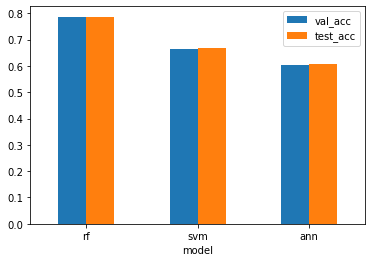

In [45]:
result_df.plot.bar(x="model", y=["val_acc","test_acc"], rot=0)